In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

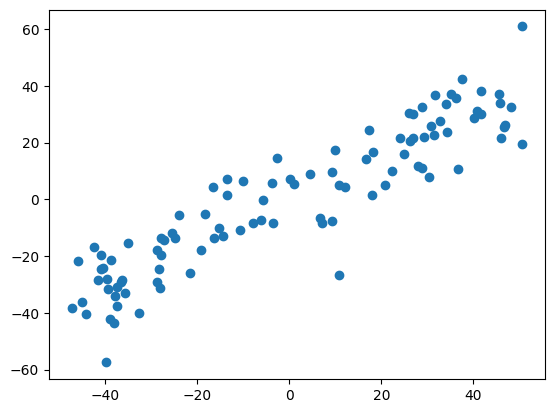

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [7]:
# 笔记中的 f 函数
# X 需要先进行 demean
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

# 推导出的向量化公式
def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 转换 w 为单位向量
def direction(w):
    return w / np.linalg.norm(w)

#梯度上升法
def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        # 这里是加号，这就是梯度上升法与梯度下降法不同的地方
        w = w + eta * gradient
        # 每次求一个单位方向
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
        
    return w

In [9]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.78238489, 0.62279522])

In [15]:
# 将原数据 X 中上面求出来的主成分去掉，再求主成分
#X2 = np.empty(X.shape)
#for i in range(len(X)):
#    X2[i] = X[i] - (X[i].dot(w) * w)

# 向量化
X2 = X - X.dot(w).reshape(-1, 1) * w

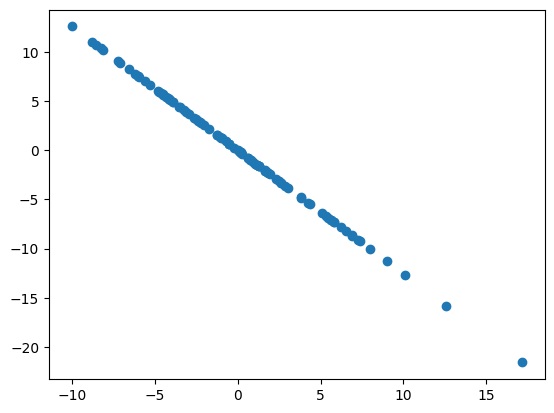

In [16]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [17]:
# 求第二主成分对应映射的轴是多少
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.62279838, -0.78238237])

In [19]:
# 封装函数：求出 X 样本的前 n 个主成分
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[-1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        # 减去上一次主成分分析的数据量
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [21]:
first_n_components(2, X)

[array([0.7823848 , 0.62279533]), array([-0.62279079,  0.78238842])]